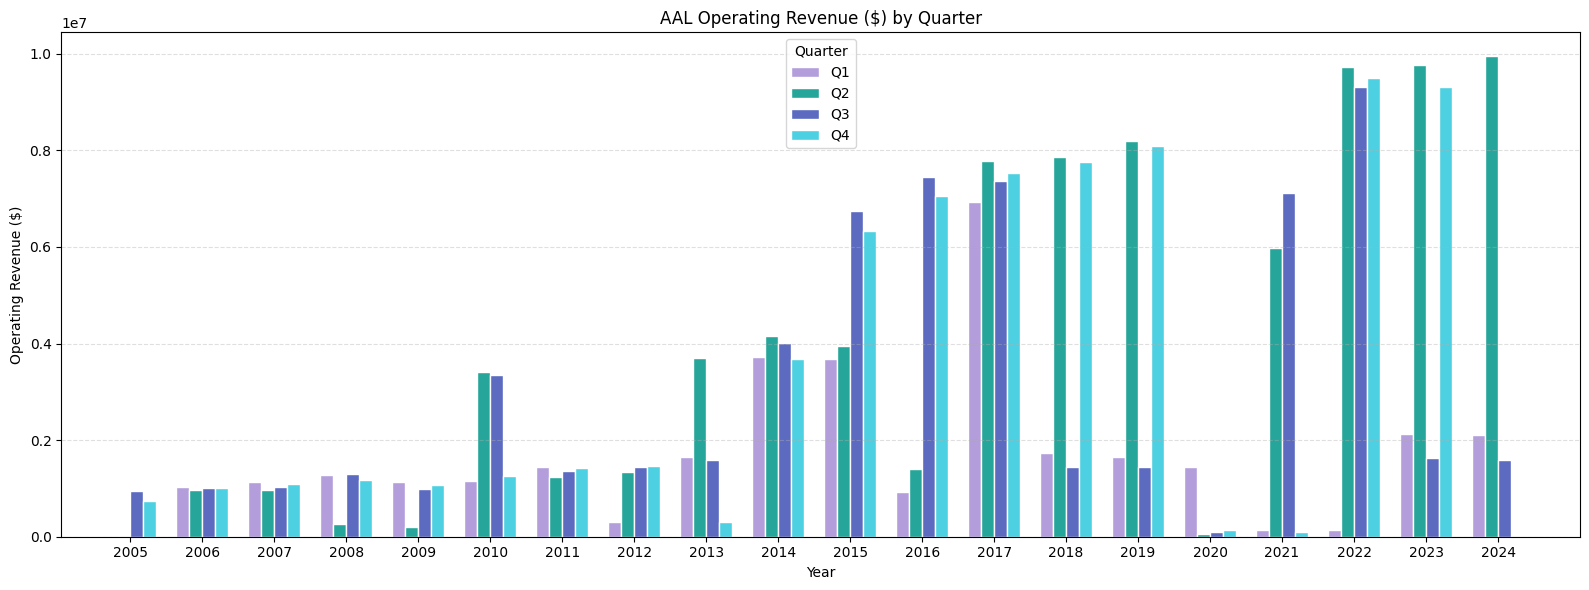

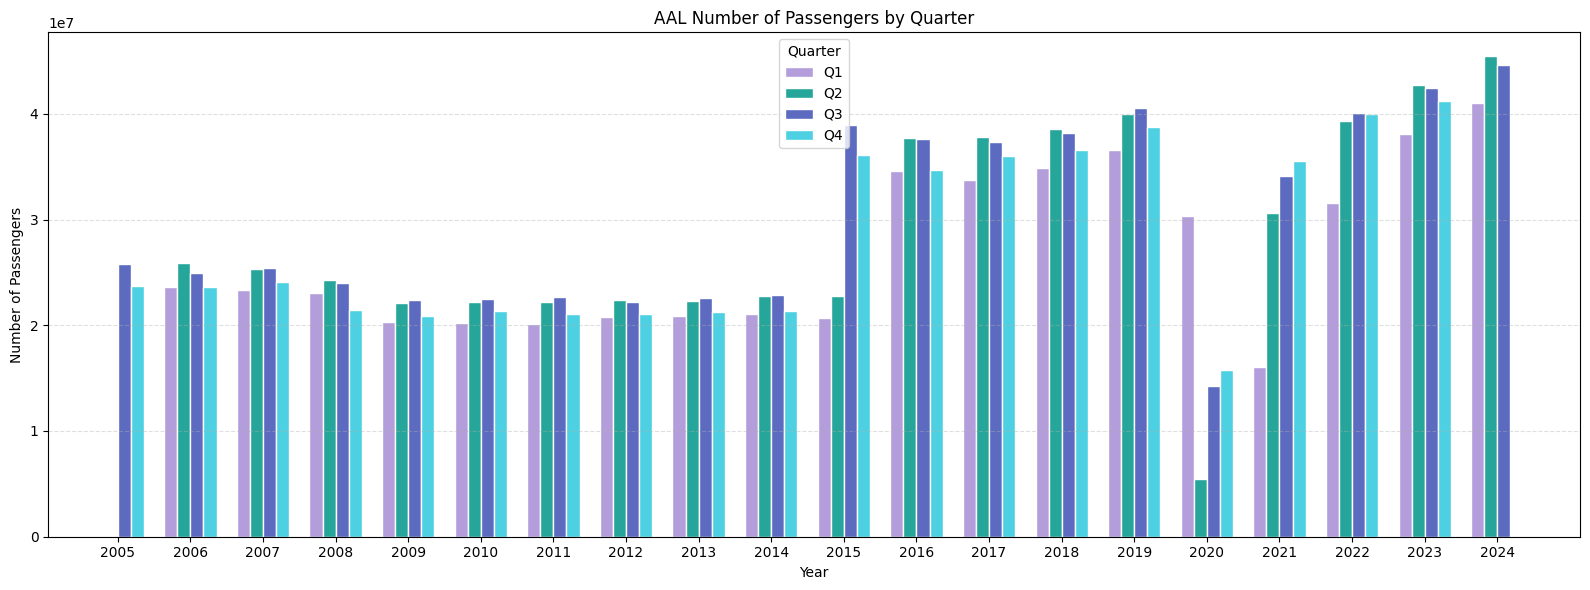

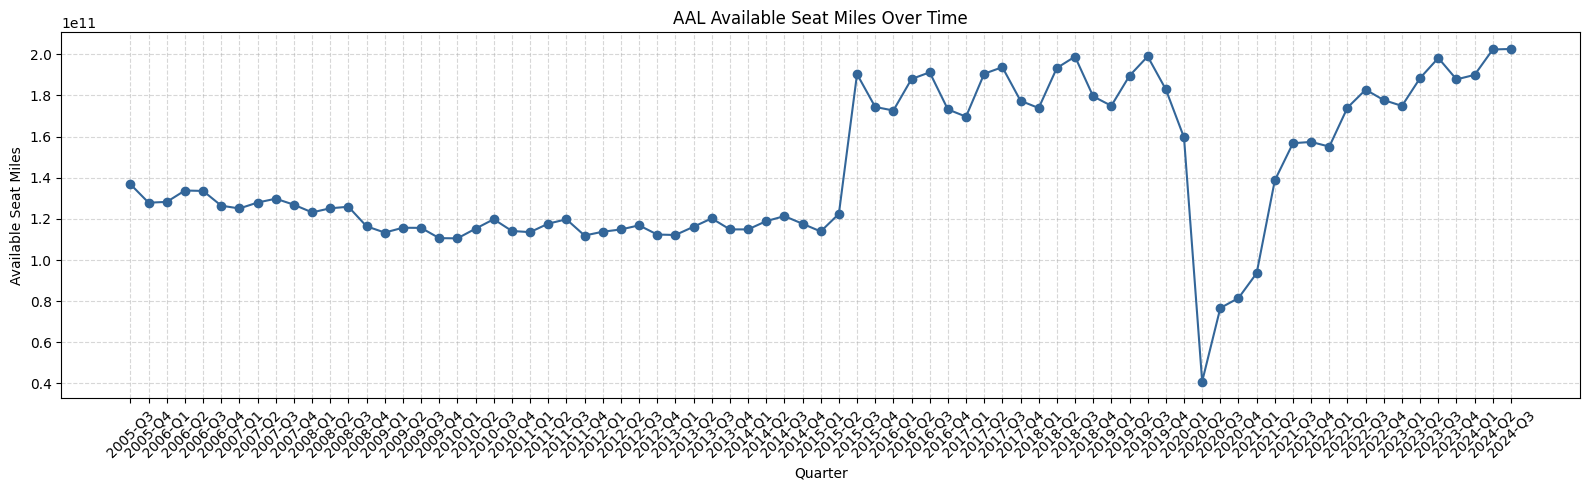

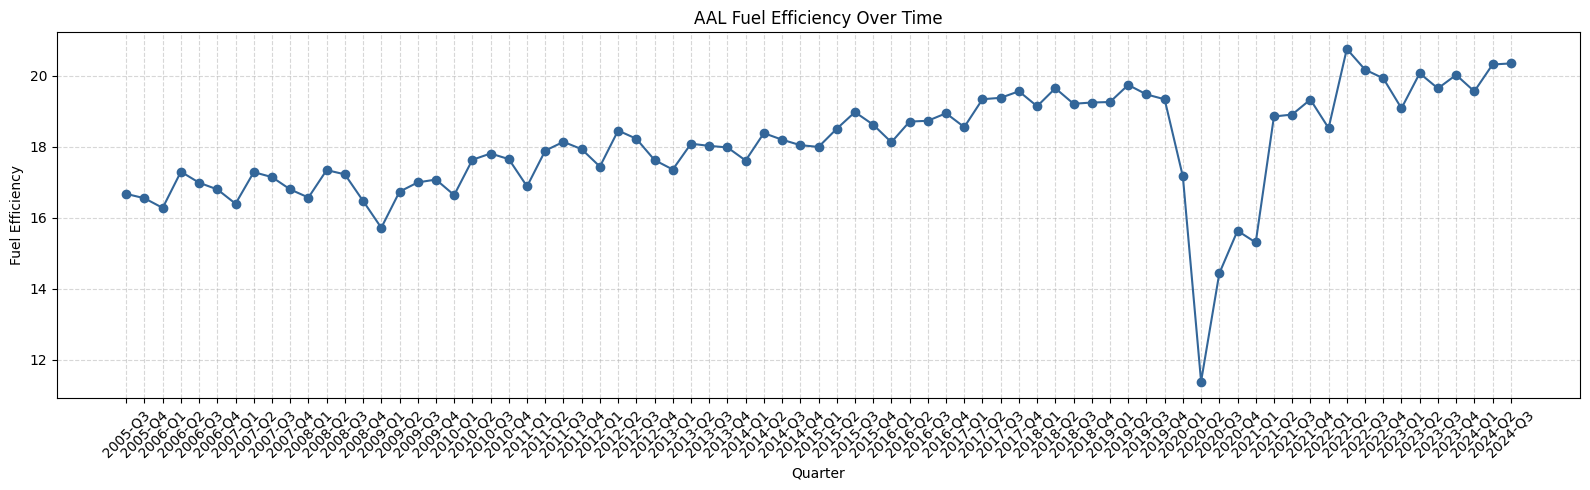

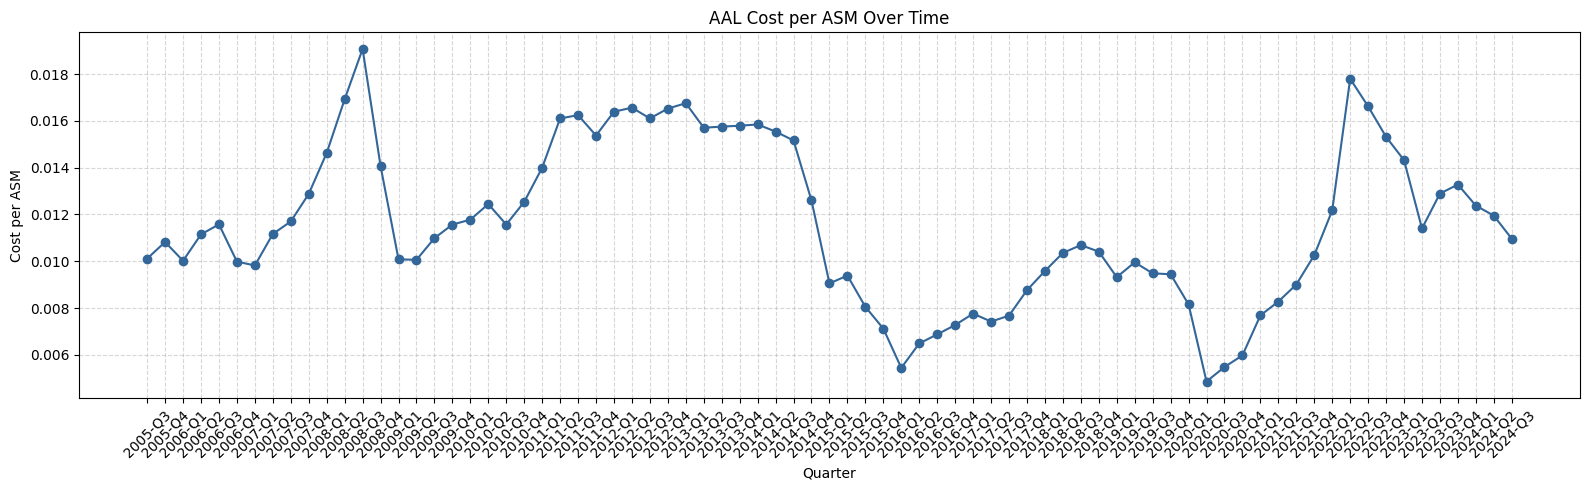

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = "Merged_Airlines_With_Revenue.csv"
df = pd.read_csv(file_path)

# Filter for ALGT airline
algt_df = df[df['Stock Ticker'] == 'AAL'].copy()

# Select and convert features
bar_features = {
    'OP_REVENUES': 'Operating Revenue ($)',
    'PASSENGERS': 'Number of Passengers'
}
line_features = {
    'ASM': 'Available Seat Miles',
    'Fuel_Efficiency': 'Fuel Efficiency',
    'CASM': 'Cost per ASM'
}

# Extract year and quarter
algt_df['Year'] = algt_df['Timeframe_Quarter'].str[:4]
algt_df['Quarter'] = algt_df['Timeframe_Quarter'].str[-2:]

# Convert feature columns to numeric
for col in list(bar_features.keys()) + list(line_features.keys()):
    algt_df[col] = pd.to_numeric(algt_df[col], errors='coerce')

# Drop missing values
algt_df = algt_df.dropna(subset=list(bar_features.keys()) + list(line_features.keys()))

# --- Bar Plot Function ---
def plot_grouped_bar(df, feature, ylabel):
    quarters = ['Q1', 'Q2', 'Q3', 'Q4']
    colors = ['#B39DDB', '#26A69A', '#5C6BC0', '#4DD0E1']
    width = 0.18

    grouped = df.groupby(['Year', 'Quarter'])[feature].sum().unstack().sort_index()
    labels = grouped.index.tolist()
    x = np.arange(len(labels))

    plt.figure(figsize=(16, 6))
    for i, quarter in enumerate(quarters):
        if quarter in grouped.columns:
            values = grouped[quarter].values
            plt.bar(x + i * width - 1.5 * width, values, width=width,
                    label=quarter, color=colors[i], edgecolor='white')

    plt.xticks(ticks=x, labels=labels)
    plt.ylabel(ylabel)
    plt.xlabel('Year')
    plt.title(f'AAL {ylabel} by Quarter')
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.legend(title='Quarter')
    plt.tight_layout()
    plt.show()

# --- Line Plot Function ---
def plot_line(df, feature, ylabel):
    agg = df[['Timeframe_Quarter', feature]].dropna().sort_values('Timeframe_Quarter')
    agg = agg.groupby('Timeframe_Quarter')[feature].sum().reset_index()

    plt.figure(figsize=(16, 5))
    plt.plot(agg['Timeframe_Quarter'], agg[feature], marker='o', color='#336699')
    plt.xticks(rotation=45)
    plt.title(f'AAL {ylabel} Over Time')
    plt.xlabel('Quarter')
    plt.ylabel(ylabel)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# --- Generate Plots ---

# Bar plots
for col, label in bar_features.items():
    plot_grouped_bar(algt_df, col, label)

# Line plots
for col, label in line_features.items():
    plot_line(algt_df, col, label)
